# Generating Climate Temperature Spirals in Python
In this project, we will try to recreate the famous animated visulatization of climate scientist Ed Hawkins, that caught the attention of the crowds back in 2017 when Hawkins tweeted it. <br>
Let's take a look at the original animation:


In [1]:
%%html 
<iframe width="560" height="315" src="https://www.youtube.com/embed/wXrYvd-LBu0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

This visualization shows the deviations from the average temperature between 1850 and 2016. It was reshared millions of times over Twitter and Facebook. To uderstand the motivation behind this animation, check [Ed Hawkins' website](http://www.climate-lab-book.ac.uk/spirals/).

# Exploring the Dataset
The underlying data was released by the Met Office in the United Kingdon, which does excellent work on weather and climate forecasting. The dataset can be downloaded directly [here](https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt). <br>
Let's first import the libraries needed in this project:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Let's download this dataset to our workspace:

In [3]:
!wget https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt

--2019-08-22 13:56:06--  https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 23.203.241.232
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|23.203.241.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217638 (213K) [text/plain]
Saving to: ‘HadCRUT.4.6.0.0.monthly_ns_avg.txt.1’

HadCRUT.4.6.0.0.mon 100%[===================>] 212.54K  --.-KB/s    in 0.06s   

2019-08-22 13:56:06 (3.52 MB/s) - ‘HadCRUT.4.6.0.0.monthly_ns_avg.txt.1’ saved [217638/217638]



Next, we need to read the dataset into a Pandas DataFrame:

In [4]:
hadcrut=pd.read_csv("HadCRUT.4.6.0.0.monthly_ns_avg.txt",delim_whitespace=True,usecols=[0,1],header=None)
hadcrut.head()

,0,1
0,1850/01,-0.700
1,1850/02,-0.286
2,1850/03,-0.732
3,1850/04,-0.563
4,1850/05,-0.327


This dataset contains two columns
- The first column represents the month/year of recording
- The second column represents the deviations from average temperature <br>
# Data Cleaning
Now, we need to:
- split the first column into month and year columns
- rename the 1 column to value
- select and save all but the first column (0)



In [0]:
hadcrut["month"]=hadcrut[0].str.split("/").str[1].astype(int)
hadcrut["year"]=hadcrut[0].str.split("/").str[0].astype(int)
hadcrut.rename(columns={1:"value"},inplace=True)
hadcrut=hadcrut[["value","month","year"]].copy()

In [6]:
hadcrut.head()

,value,month,year
0,-0.700,1,1850
1,-0.286,2,1850
2,-0.732,3,1850
3,-0.563,4,1850
4,-0.327,5,1850


In [7]:
hadcrut["year"].value_counts(ascending=True).head()

2019     6
1958    12
1959    12
1960    12
1961    12
Name: year, dtype: int64

In order to keep our data consistent and tidy, we will remove the rows containing data from 2019, since it is the only year with 6 months, not all 12 months:

In [8]:
hadcrut=hadcrut.drop(hadcrut[hadcrut["year"]==2019].index)
hadcrut["year"].value_counts(ascending=True).head()

1850    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

Lastly, let’s compute the mean of the global temperatures from 1850 to 1900 and subtract that value from the entire dataset. To make this easier, we’ll create a multiindex using the year and month columns:

In [9]:
hadcrut=hadcrut.set_index(["year","month"])
hadcrut.head(20)

value
year month       
1850 1     -0.700
     2     -0.286
     3     -0.732
     4     -0.563
     5     -0.327
     6     -0.213
     7     -0.125
     8     -0.237
     9     -0.439
     10    -0.451
     11    -0.187
     12    -0.257
1851 1     -0.296
     2     -0.356
     3     -0.479
     4     -0.441
     5     -0.295
     6     -0.197
     7     -0.212
     8     -0.157

This way, we will be only modifying the "value" column:

In [10]:
hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut.head()

value
year month          
1850 1     -0.386559
     2      0.027441
     3     -0.418559
     4     -0.249559
     5     -0.013559

Let's reset the index to its default layout:

In [11]:
hadcrut=hadcrut.reset_index()
hadcrut.head()

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559


# Preparing data for polar plotting
The key phases to recreate the visualization:
- transforming the data for polar visualization
- customizing the aesthetics of the plot
- stepping through the visualization year-by-year and turning the plot into a GIF <br>

Let's start by plotting the data for the 1850 in polar coordinates: <br>
It is important first to adjust the data to contain no negative values, let's find the minimum temperature value:


In [12]:
hadcrut["value"].min()

-0.660558823529412

Let’s add 2 to all temperature values, so they’ll be positive but there’s still some space reserved around the origin for displaying text: 

In [0]:
hc_1850=hadcrut[hadcrut["year"]==1850]
r=hc_1850["value"]+1
theta=np.linspace(0,2*np.pi,12)

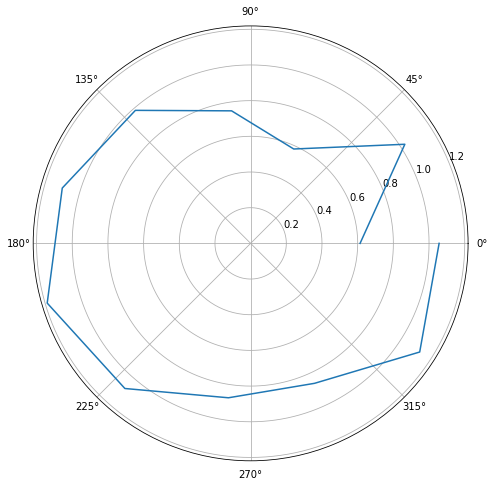

In [14]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
plt.show()

# Tweaking the Aesthetics
Let's remove the tick labels for both axes:

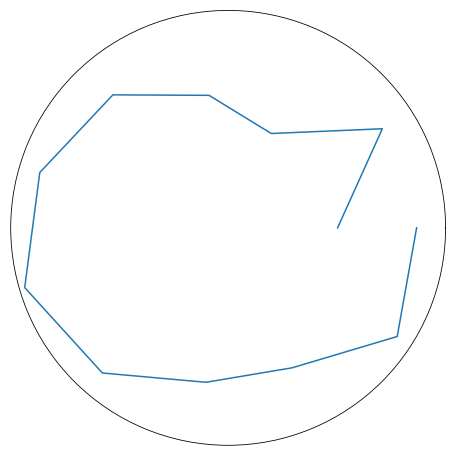

In [15]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

Next, let's tweak the color; we need the background color within the polar plot to be black, and the color surrounding the polar plot to be gray:

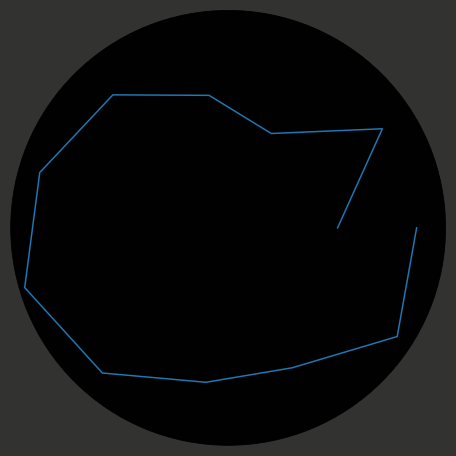

In [16]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

Next, let's add the title:

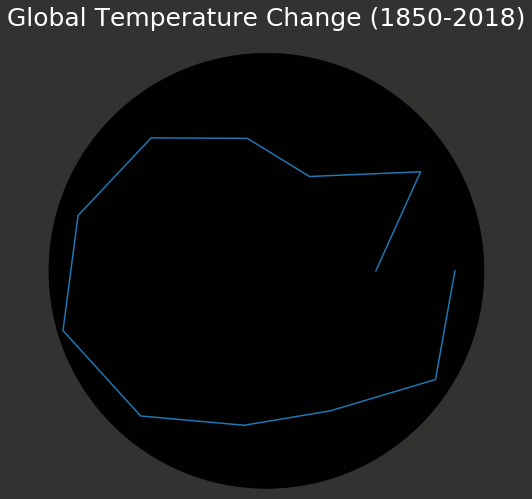

In [17]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
plt.show()

Lastly, let’s add the text in the center that specifies the current year that’s being visualized:

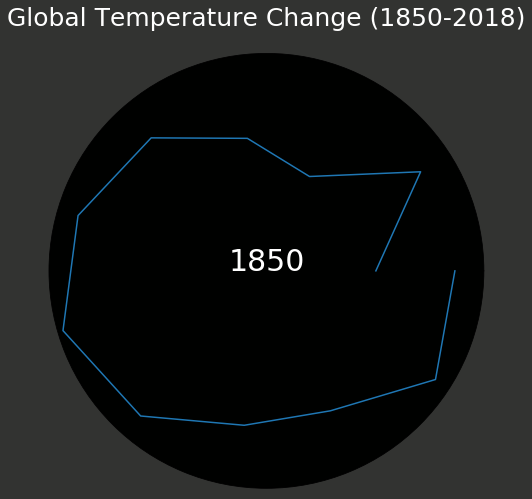

In [18]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.text(0,0,"1850",color="white",size=30,ha="center")
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

# Plotting the remaining years
It is important here is to manually set the axis limit for r (or y in matplotlib). This is because matplotlib scales the size of the plot automatically based on the data that’s used. This is why, in the last step, the data for just 1850 was displayed at the edge of the plotting area. <br> 
To mimick the original animation, let’s calculate the maximum temperature value in the entire dataset and add a generous amount of padding:

In [19]:
hadcrut["value"].max()

1.4244411764705882

In [20]:
ax1.set_ylim(0,3.25)

(0, 3.25)

Next, let's loop over the rest of the data to generate the plots for the rest of the years:

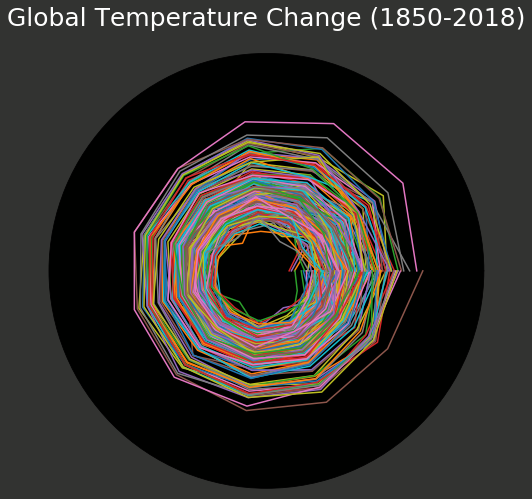

In [21]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for year in years:
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r)
plt.show()

# Customizing the colors
Right now, the colors feel a bit random and don’t correspond to the gradual heating of the climate that the original visualization conveys well. In the original visualiation, the colors transition from blue / purple, to green, to yellow. This color scheme is known as sequential colormap, because the progression of colors has a meaning in the data. <br>
Essentially, we use the color parameter in the Axes.plot() method and draw colors from plt.cm.<colormap_name>(index\*2) to progress from blue to green and eventually reach yellow:


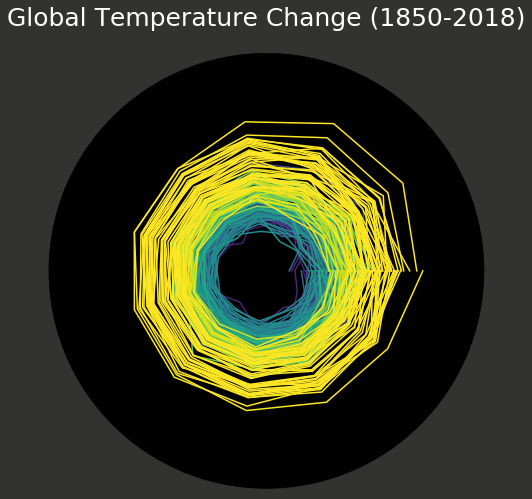

In [22]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))
plt.show()

# Adding Temperature Rings
At this stage, the viewer can't actually understand the underlying data at all. There is no indication of temperture values in the visualization. <br>
Next, we will add temperature rings at 0.0, 1.5, 2.0 degrees Celsius:

In [0]:
full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[0.0+1.0]*1000
red_one_radii=[1.5+1.0]*1000
red_two_radii=[2.0+1.0]*1000

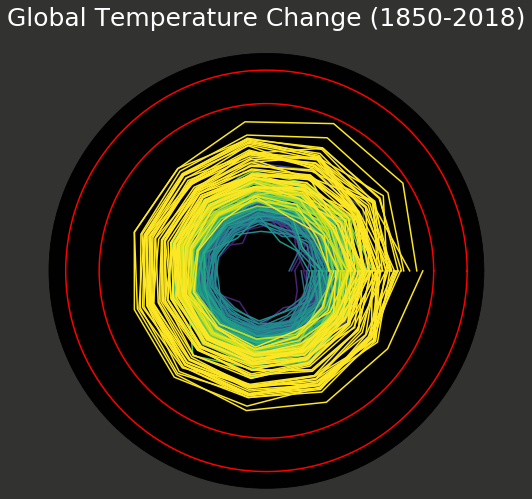

In [24]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))
plt.show()

Next, we can add the text specifying the ring’s temperature values. All 3 of these text values are at the 0.5\*pi angle, at varying distance values:

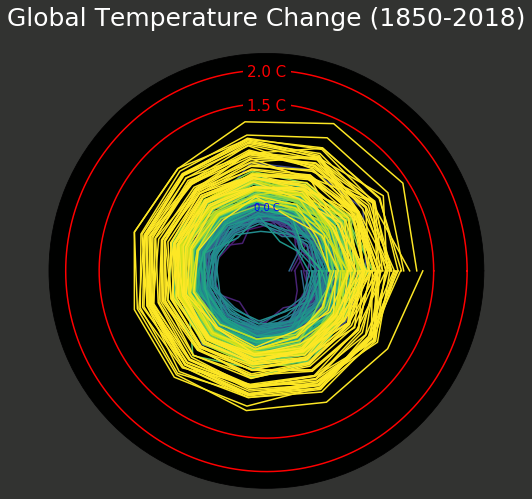

In [25]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center')
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))

plt.show()

Lastly, let's add month values to the outer rim of the polar plot:

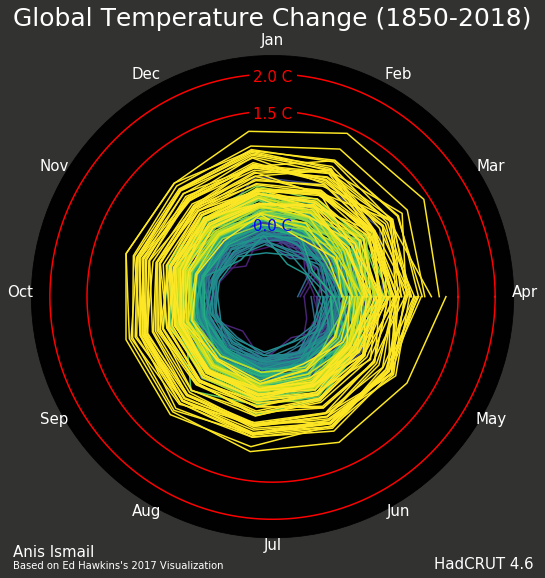

In [26]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25,ha="center")
ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center',fontsize= 15)
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

fig.text(0.78,0,"HadCRUT 4.6",color="white",fontsize=15)
fig.text(0.05,0.02,"Anis Ismail",color="white",fontsize=15)
fig.text(0.05,0,"Based on Ed Hawkins's 2017 Visualization",color="white",fontsize=10)

#add months ring
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i,month in enumerate(months):
  ax1.text(months_angles[i],3.4,month,color="white",fontsize=15,ha="center")

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))

plt.tight_layout()
plt.show()

# Generating The GIF Animation
Now we’re ready to generate a GIF animation from the plot. An animation is a series of images that are displayed in rapid succession. We’ll use the matplotlib.animation.FuncAnimation function to help us with this:

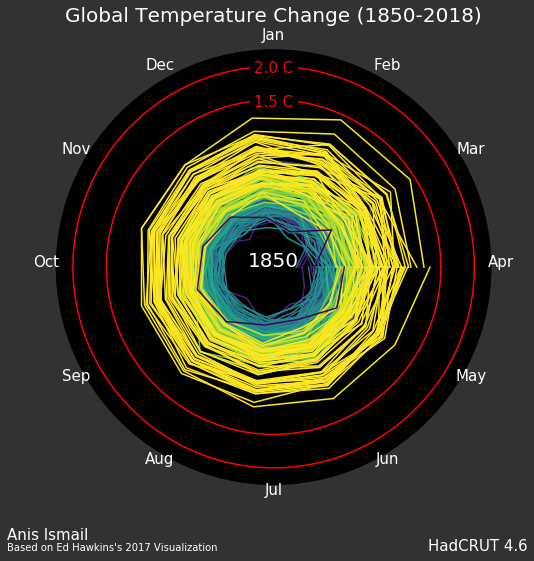

In [27]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=20)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center',fontsize= 15)
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

fig.text(0.78,0.01,"HadCRUT 4.6",color="white",fontsize=15)
fig.text(0.05,0.03,"Anis Ismail",color="white",fontsize=15)
fig.text(0.05,0.01,"Based on Ed Hawkins's 2017 Visualization",color="white",fontsize=10)

months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i,month in enumerate(months):
  ax1.text(months_angles[i],3.4,month,color="white",fontsize=15,ha="center")

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    ax1.text(0,0,year,fontsize=20,color="white",ha="center")
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=100)

anim.save('climate_spiral.gif', writer="pillow", savefig_kwargs={'facecolor': '#323331'})